참고 문서 : https://justweon-dev.tistory.com/20

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [11]:
import pandas as pd

data = pd.read_csv('/content/sample_data/TSLA.csv')   #데이터 가져오기

print(data)

            Date        Open        High         Low       Close   Adj Close  \
0     2010-06-29   19.000000   25.000000   17.540001   23.889999   23.889999   
1     2010-06-30   25.790001   30.420000   23.299999   23.830000   23.830000   
2     2010-07-01   25.000000   25.920000   20.270000   21.959999   21.959999   
3     2010-07-02   23.000000   23.100000   18.709999   19.200001   19.200001   
4     2010-07-06   20.000000   20.000000   15.830000   16.110001   16.110001   
...          ...         ...         ...         ...         ...         ...   
2411  2020-01-28  568.489990  576.809998  558.080017  566.900024  566.900024   
2412  2020-01-29  575.690002  589.799988  567.429993  580.989990  580.989990   
2413  2020-01-30  632.419983  650.880005  618.000000  640.809998  640.809998   
2414  2020-01-31  640.000000  653.000000  632.520020  650.570007  650.570007   
2415  2020-02-03  673.690002  786.140015  673.520020  780.000000  780.000000   

        Volume  
0     18766300  
1    

In [12]:
features = data.drop(['Date', 'Close'], axis=1)   #필요없는 속성 제거
target = data['Close']
print(features)

            Open        High         Low   Adj Close    Volume
0      19.000000   25.000000   17.540001   23.889999  18766300
1      25.790001   30.420000   23.299999   23.830000  17187100
2      25.000000   25.920000   20.270000   21.959999   8218800
3      23.000000   23.100000   18.709999   19.200001   5139800
4      20.000000   20.000000   15.830000   16.110001   6866900
...          ...         ...         ...         ...       ...
2411  568.489990  576.809998  558.080017  566.900024  11788500
2412  575.690002  589.799988  567.429993  580.989990  17801500
2413  632.419983  650.880005  618.000000  640.809998  29005700
2414  640.000000  653.000000  632.520020  650.570007  15719300
2415  673.690002  786.140015  673.520020  780.000000  47065000

[2416 rows x 5 columns]


In [13]:
from sklearn.model_selection import train_test_split
import numpy as np

train_input, test_input, train_target, test_target = train_test_split(    #데이터 나누기
    features, target, test_size=0.2, random_state=42
)


스케일링 사실 안해도 되지만 학습능력을 올리기 위해 사용

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_input_scaled = scaler.fit_transform(train_input)
test_input_scaled = scaler.transform(test_input)


K-최근접 알고리즘

In [15]:
from sklearn.neighbors import KNeighborsRegressor

k = 5
knn_regressor = KNeighborsRegressor(n_neighbors=k)

knn_regressor.fit(train_input_scaled, train_target)   #데이터 학습

KNeighborsRegressor()

In [18]:
predicted_target = knn_regressor.predict(test_input_scaled)

In [19]:
from sklearn.metrics import mean_absolute_error

# 모델 평가
mae = mean_absolute_error(test_target, predicted_target)    #학습모델의 오차
print(f'평균 오차: {mae}')        # -> 0에 가까울 수록 오차가 적은 것

평균 오차: 2.466020559504131


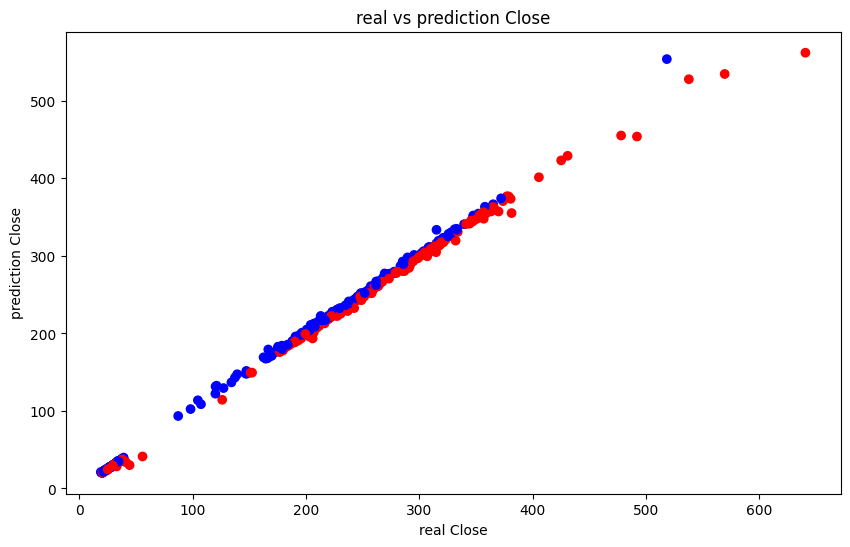

In [82]:
# K-최근접 이웃 회귀
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))   #예측값, 실제 값 데이터 다른게 표현
plt.scatter(test_target, predicted_target, c=['blue' if x[0] < x[1] else 'red' for x in zip(test_target, predicted_target)], label='real vs prediction')
plt.xlabel('real Close')
plt.ylabel('prediction Close')
plt.title('real vs prediction Close')
plt.show()

In [83]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
linear_regressor.fit(train_input_scaled, train_target)

LinearRegression()

In [84]:
predicted_target_linear = linear_regressor.predict(test_input_scaled)

In [85]:
mae_linear = mean_absolute_error(test_target, predicted_target_linear)
print(f'평균 오차 (선형 회귀): {mae_linear}')

평균 오차 (선형 회귀): 3.601159774420508e-14


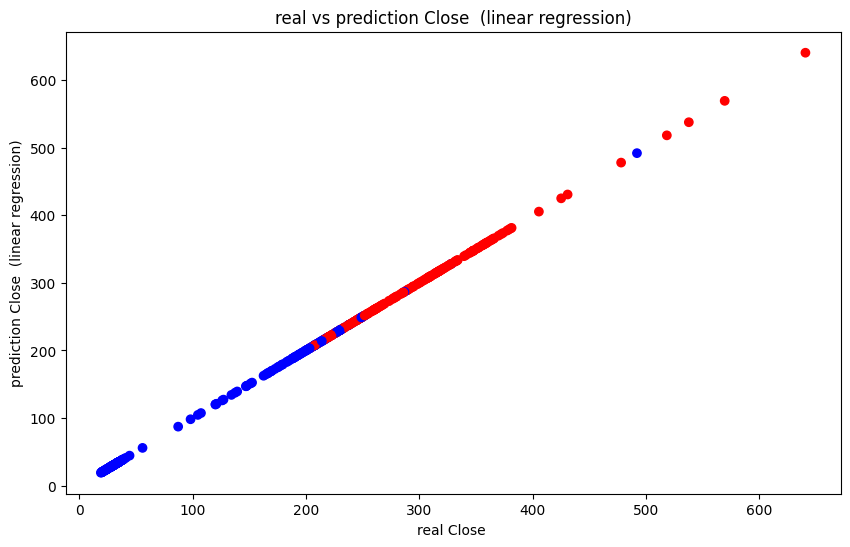

In [86]:
# 선형 회귀
plt.figure(figsize=(10, 6))
plt.scatter(test_target, predicted_target_linear, c=['blue' if x[0] < x[1] else 'red' for x in zip(test_target, predicted_target_linear)], label='real vs prediction')
plt.xlabel('real Close ')
plt.ylabel('prediction Close  (linear regression)')
plt.title('real vs prediction Close  (linear regression)')
plt.show()

In [87]:
# 라쏘 회귀
lasso_regressor = Lasso()
lasso_regressor.fit(train_input_scaled, train_target)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.519e+03, tolerance: 2.692e+03
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [98]:
print(lasso_regressor.score(train_input_scaled, train_target))

0.9997621049024746


https://brunch.co.kr/@itschloe1/11

c=['blue' if x[0] < x[1] else 'red' for x in zip(test_target, predicted_target_lasso) 찾아도 나오지 않아서 GPT에서 받아왔습니다.

In [99]:
predicted_target_lasso = lasso_regressor.predict(test_input_scaled)   #타겟 값 예측

In [100]:
mae_lasso = mean_absolute_error(test_target, predicted_target_lasso)
print(f'평균 오차 (라쏘 회귀): {mae_lasso}')

평균 오차 (라쏘 회귀): 1.482155158599503


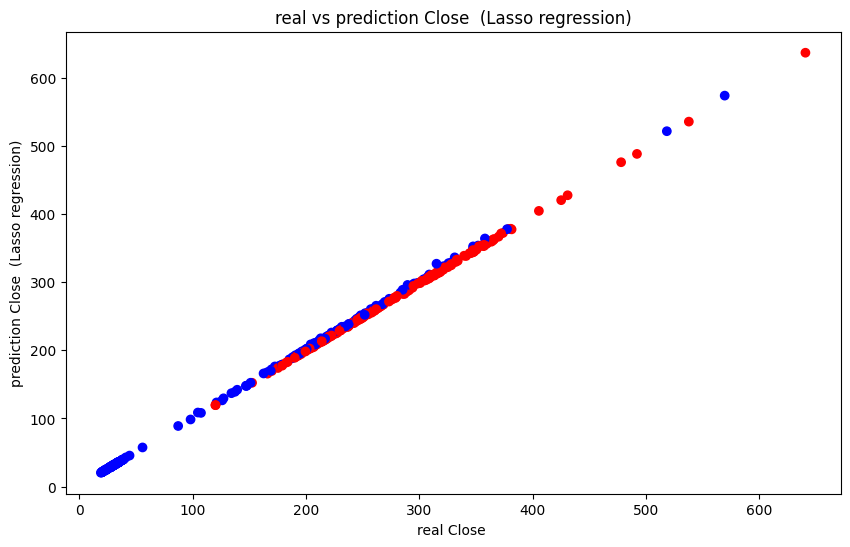

In [101]:
#라쏘 회귀
plt.figure(figsize=(10, 6))
plt.scatter(test_target, predicted_target_lasso, c=['blue' if x[0] < x[1] else 'red' for x in zip(test_target, predicted_target_lasso)], label='real vs prediction')
plt.xlabel('real Close ')
plt.ylabel('prediction Close  (Lasso regression)')
plt.title('real vs prediction Close  (Lasso regression)')
plt.show()


In [102]:
# 릿지 회귀
ridge_regressor = Ridge()
ridge_regressor.fit(train_input_scaled, train_target)

Ridge()

In [103]:
predicted_target_ridge = ridge_regressor.predict(test_input_scaled)

In [104]:
mae_ridge = mean_absolute_error(test_target, predicted_target_ridge)
print(f'평균 오차 (릿지 회귀): {mae_ridge}')

평균 오차 (릿지 회귀): 0.6381497319651125


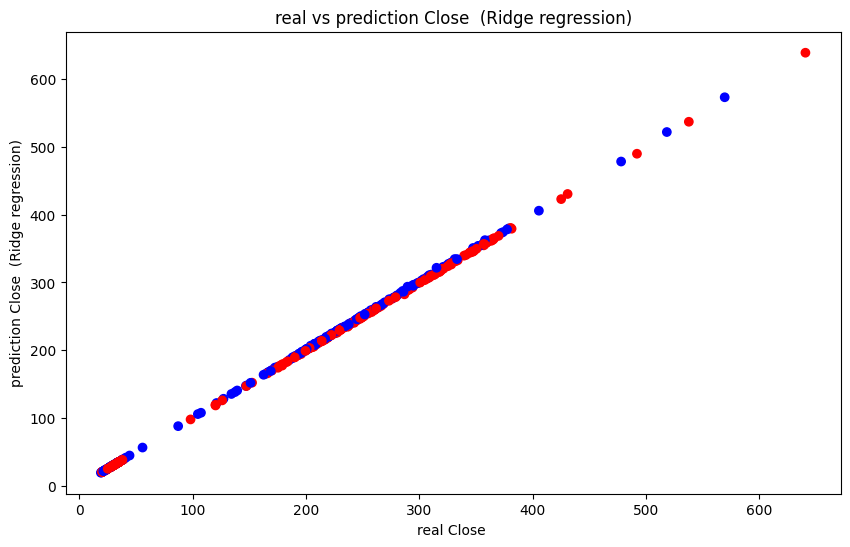

In [105]:
# 시각화 - 릿지 회귀
plt.figure(figsize=(10, 6))
plt.scatter(test_target, predicted_target_ridge, c=['blue' if x[0] < x[1] else 'red' for x in zip(test_target, predicted_target_ridge)], label='real vs prediction')
plt.xlabel('real Close ')
plt.ylabel('prediction Close  (Ridge regression)')
plt.title('real vs prediction Close  (Ridge regression)')
plt.show()

In [113]:
from sklearn.model_selection import GridSearchCV

# 라쏘회귀 그리드서치
lasso_regressor = Lasso()
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10], 'max_iter': [1000, 2000, 3000, 4000, 5000]}  # max_iter최대 반복횟수 지정 , alpha : 하이퍼파라미터 지정
lasso_grid = GridSearchCV(lasso_regressor, lasso_params, cv=5, scoring='neg_mean_absolute_error') #그리드서치로 파라미터 탐색
lasso_grid.fit(train_input_scaled, train_target)

dt = lasso_grid.best_estimator_
print(dt.score(train_input_scaled, train_target))

print(lasso_grid.best_params_)
#하이퍼 파라미터 조정
lasso_alphas = [x['alpha'] for x in lasso_grid.cv_results_['params']]
lasso_scores = -lasso_grid.cv_results_['mean_test_score']
print(-lasso_grid.cv_results_['mean_test_score'])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.151e+03, tolerance: 2.103e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.184e+03, tolerance: 2.160e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.190e+03, tolerance: 2.134e

0.9999928099451824
{'alpha': 0.01, 'max_iter': 5000}
[0.91305731 0.62115685 0.51701559 0.44401447 0.40648666 0.93727979
 0.57657044 0.3990122  0.27493505 0.19325283 0.97975974 0.57435797
 0.31284453 0.23864223 0.23864223 1.44900488 1.06253879 0.8918221
 0.86406117 0.86406117 8.55605457 8.51572012 8.51426038 8.51111372
 8.51111372]


0.01


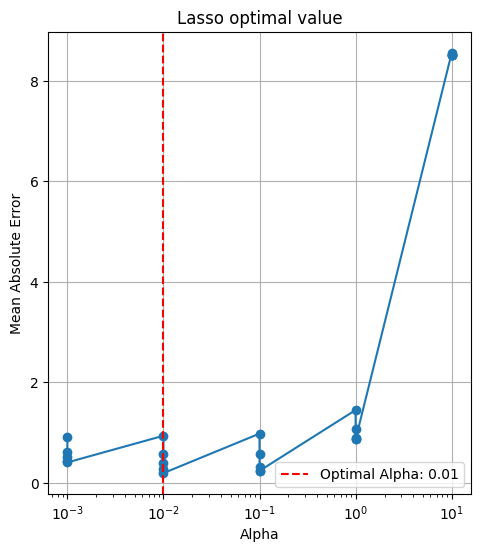

In [106]:

plt.figure(figsize=(12, 6))

# Plotting Lasso
plt.subplot(1, 2, 1)
plt.plot(lasso_alphas, lasso_scores, marker='o')
plt.title('Lasso optimal value')
plt.xlabel('Alpha')
plt.ylabel('Mean Absolute Error')
plt.xscale('log')
plt.grid(True)

#최적의 하이퍼파라미터 탐색
best_lasso_alpha = lasso_grid.best_params_['alpha']
plt.axvline(x=best_lasso_alpha, color='red', linestyle='--', label=f'Optimal Alpha: {best_lasso_alpha}')
plt.legend()

print(best_lasso_alpha)

In [116]:
# 릿지회귀 그리드서치
ridge_regressor = Ridge()
ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10], 'max_iter': [1000, 2000, 3000, 4000, 5000]}
ridge_grid = GridSearchCV(ridge_regressor, ridge_params, cv=5, scoring='neg_mean_absolute_error')
ridge_grid.fit(train_input_scaled, train_target)

dt = ridge_grid.best_estimator_
print(dt.score(train_input_scaled, train_target))

print(ridge_grid.best_params_)

#하이퍼 파라미터 조정
ridge_alphas = [x['alpha'] for x in ridge_grid.cv_results_['params']]
ridge_scores = -ridge_grid.cv_results_['mean_test_score']

print(-ridge_grid.cv_results_['mean_test_score'])

0.9999999990890144
{'alpha': 0.001, 'max_iter': 1000}
[0.0030623  0.0030623  0.0030623  0.0030623  0.0030623  0.0290782
 0.0290782  0.0290782  0.0290782  0.0290782  0.19961937 0.19961937
 0.19961937 0.19961937 0.19961937 0.72907199 0.72907199 0.72907199
 0.72907199 0.72907199 1.49765897 1.49765897 1.49765897 1.49765897
 1.49765897]


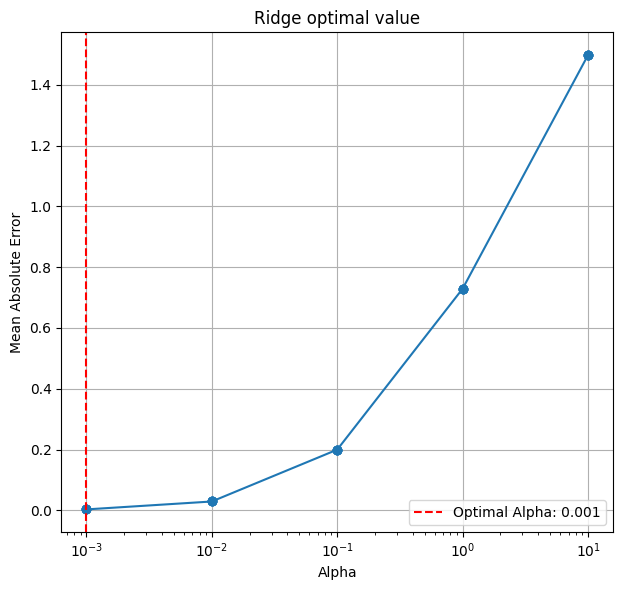

In [117]:
plt.figure(figsize=(12, 6))

#릿지 그래프
plt.subplot(1, 2, 2)
plt.plot(ridge_alphas, ridge_scores, marker='o')
plt.title('Ridge optimal value')
plt.xlabel('Alpha')
plt.ylabel('Mean Absolute Error')
plt.xscale('log')
plt.grid(True)

#최적의 하이퍼파라미터 탐색
best_ridge_alpha = ridge_grid.best_params_['alpha']
plt.axvline(x=best_ridge_alpha, color='red', linestyle='--', label=f'Optimal Alpha: {best_ridge_alpha}')
plt.legend()
plt.tight_layout()
plt.show()
